<a href="https://colab.research.google.com/github/mario-rot/Introduction-to-Human-Language-Technology/blob/main/Session7_LaurenTucker_MarioRosas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab session 7 (Word Sequences) - ILTH

**Students:** Lauren Tucker & Mario Rosas !!!

## Paraphrases Template

In [2]:
%%shell
git clone https://github.com/mario-rot/Introduction-to-Human-Language-Technology.git
cd 'Introduction-to-Human-Language-Technology'
mv 'Complementary Material' /content/

pip install svgling

Cloning into 'Introduction-to-Human-Language-Technology'...
remote: Enumerating objects: 861, done.
remote: Counting objects: 100% (861/861), done.
remote: Compressing objects: 100% (789/789), done.
remote: Total 861 (delta 115), reused 788 (delta 67), pack-reused 0
Receiving objects: 100% (861/861), 2.26 MiB | 2.33 MiB/s, done.
Resolving deltas: 100% (115/115), done.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 67 kB 3.0 MB/s 


In [3]:
import pandas as pd

In [117]:
dt = pd.read_csv('Complementary Material/test-gold/STS.input.SMTeuroparl.txt',sep='\t',header=None)

In [118]:
dt.head()

,0,1
0,The leaders have now been given a new chance a...,The leaders benefit aujourd' hui of a new luck...
1,Amendment No 7 proposes certain changes in the...,Amendment No 7 is proposing certain changes in...
2,Let me remind you that our allies include ferv...,I would like to remind you that among our alli...
3,The vote will take place today at 5.30 p.m.,The vote will take place at 5.30pm
4,"The fishermen are inactive, tired and disappoi...","The fishermen are inactive, tired and disappoi..."


In [119]:
dt['gs'] = pd.read_csv('Complementary Material/test-gold/STS.gs.SMTeuroparl.txt',sep='\t',header=None)

In [120]:
dt.shape

(459, 3)

In [121]:
dt.head()

,0,1,gs
0,The leaders have now been given a new chance a...,The leaders benefit aujourd' hui of a new luck...,4.50
1,Amendment No 7 proposes certain changes in the...,Amendment No 7 is proposing certain changes in...,5.00
2,Let me remind you that our allies include ferv...,I would like to remind you that among our alli...,4.25
3,The vote will take place today at 5.30 p.m.,The vote will take place at 5.30pm,4.50
4,"The fishermen are inactive, tired and disappoi...","The fishermen are inactive, tired and disappoi...",5.00


# Excercise

In [182]:
from nltk.metrics import jaccard_distance
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
import nltk
nltk.download('maxent_ne_chunker')
nltk.download('conll2000')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('words')
nltk.download('wordnet')
nltk.download('omw-1.4')
from scipy.stats import pearsonr
import numpy as np

import string
import collections
import nltk
from nltk import ne_chunk
from nltk.corpus.reader.wordnet import VERB, NOUN, ADJ, ADV
from nltk.corpus import gutenberg
from nltk.text import Text
nltk.download('gutenberg')
nltk.download('stopwords')

def remove_signs(wrd):
  wrd = list(wrd)
  wrd = [word for word in wrd if not any(caracter in signs for caracter in word)]
  wrd = ''.join(wrd)
  return wrd

def clean(corpus, stopwords, minwords_len, signs):
  #  corpus = corpus.split(' ')
   corpus = [word.lower() for word in corpus]
   corpus = [word if not any(caracter in signs for caracter in word) else remove_signs(word) for word in corpus]
   corpus = [word for word in corpus if word not in stopwords and word.isalpha()]
   corpus = [word for word in corpus if len(word) > minwords_len]
   return corpus

from nltk.corpus.reader.wordnet import VERB, NOUN, ADJ, ADV
pos_map = {'N': NOUN,
           'V':VERB,
           'J':ADJ,
           'R':ADV}

# corpus = list(gutenberg.words('blake-poems.txt'))
stopwords=set(nltk.corpus.stopwords.words('english'))
signs = string.punctuation
minwords_len = 2

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Package gute

In [10]:
cleaned = clean('Mark Pedersen and John Smith are working at Google', stopwords, minwords_len, signs)
cleaned

['Mark', 'Pedersen', 'John', 'Smith', 'working', 'Google']

In [11]:
accepted_pos = ['JJ', 'JJR', 'JJS', 'NN', 'NNS', 'NNP', 'NNPS', 'RB', 'RBR', 'RBS', 'VB', 'VBD', 'VBN', 'VBP', 'VBZ']

pos_map = {'n': ['NN', 'NNS', 'NNP', 'NNPS'],
           'v': ['VB', 'VBD', 'VBN', 'VBP', 'VBZ'],
           'j': ['JJ', 'JJR', 'JJS'],
           'r': ['RB', 'RBR', 'RBS']}
correcting = {'n':'n', 'v':'v', 'j':'a', 'r':'r'}
pos_map2 = {'N': NOUN,
           'V':VERB,
           'J':ADJ,
           'R':ADV}


def filter_pos(pair):
    if pair[1][0].lower() in list(pos_map.keys()):
        return pair[0], correcting[pair[1][0].lower()]
    return None, None

# def filter_pos(pair):
#     if pair[1] in accepted_pos:
#         return pair
#     return None, None

In [19]:
token = nltk.word_tokenize('Mark Pedersen and John Smith are working at Google')
x = nltk.pos_tag(token)
res = nltk.ne_chunk(x)

split_res = [item for item in res]

print(token)
print(cleaned)
print(res[0])

['Mark', 'Pedersen', 'and', 'John', 'Smith', 'are', 'working', 'at', 'Google']
['Mark', 'Pedersen', 'John', 'Smith', 'working', 'Google']
(PERSON Mark/NNP)


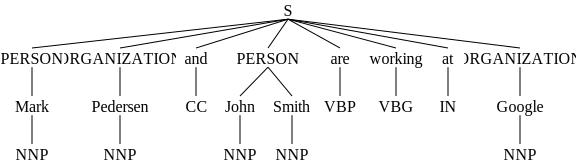

In [20]:
res

In [68]:
def get_nes(sentence):
  token = nltk.word_tokenize(sentence)
  x = nltk.pos_tag(token)
  res = nltk.ne_chunk(x)
  named_entities = []
  for item in res:
    try: 
      ne = item.label()
      named_entities.append(ne)
    except:
      pass

  if named_entities != []:
    return named_entities

In [54]:
get_nes('Mark Pedersen and John Smith are working at Google')

['PERSON', 'ORGANIZATION', 'PERSON', 'ORGANIZATION']

In [84]:
def compute_metric(metric, elements): # Fenction to calculate Jaccard Distance
  if metric == 'jaccard':
    print(get_nes(elements[0]), get_nes(elements[1]))
    if get_nes(elements[0]) != None and get_nes(elements[1]) != None: 
      res = jaccard_distance(set(get_nes(elements[0])),
                              set(get_nes(elements[1]))) 
      return res

In [183]:
dt['jaccard'] = ""
dt

,0,1,gs,jaccard
0,The leaders have now been given a new chance a...,The leaders benefit aujourd' hui of a new luck...,4.500,
1,Amendment No 7 proposes certain changes in the...,Amendment No 7 is proposing certain changes in...,5.000,
2,Let me remind you that our allies include ferv...,I would like to remind you that among our alli...,4.250,
3,The vote will take place today at 5.30 p.m.,The vote will take place at 5.30pm,4.500,
4,"The fishermen are inactive, tired and disappoi...","The fishermen are inactive, tired and disappoi...",5.000,
...,...,...,...,...
454,It is our job to continue to support Latvia wi...,It is of our duty of continue to support the c...,5.000,
455,The vote will take place today at 5.30 p.m.,Vote will take place at 17 h 30.,4.750,
456,Neither was there a qualified majority within ...,There was no qualified majority in this Parlia...,5.000,
457,Let me remind you that our allies include ferv...,"I hold you recall that our allies, there are e...",4.000,


In [86]:
for i in range(len(dt)): # Iterating to get Jaccard distances over each column of the dataframe
  print((compute_metric('jaccard',[dt.iloc[i][0],dt.iloc[i][1]]))*10)

None None


TypeError: ignored

In [87]:
for i in range(len(dt)): # Iterating to get Jaccard distances over each column of the dataframe
  if np.float64(compute_metric('jaccard',[dt.iloc[i][0],dt.iloc[i][1]]))*10 != 0:
    dt['jaccard'][i] = np.float64(compute_metric('jaccard',[dt.iloc[i][0],dt.iloc[i][1]]))*10

None None
None None
None None
None None
None None
None None
None None
None None
None None
None None
['ORGANIZATION'] ['ORGANIZATION']
None None


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


None None
None None
None None
None None
None None
None None
None None
None None
None None
['GPE'] ['GPE']
['ORGANIZATION'] ['ORGANIZATION']
None None
None None
None None
None None
['GPE'] ['GPE']
['ORGANIZATION'] ['ORGANIZATION', 'ORGANIZATION']
None ['GPE']
None ['GPE']
['ORGANIZATION'] ['ORGANIZATION']
None None
None None
['GPE'] ['GPE']
['ORGANIZATION'] ['ORGANIZATION']
['GPE'] ['GPE']
['ORGANIZATION'] ['ORGANIZATION']
['ORGANIZATION'] ['ORGANIZATION']
None None
None None
None None
None None
None None
None None
None ['GPE']
None ['GPE']
None None
None None
None None
None None
None None
None None
['ORGANIZATION'] ['ORGANIZATION']
['GPE'] None
['GPE'] None
None None
None None
None None
None None
None ['GPE']
None ['GPE']
['ORGANIZATION'] ['ORGANIZATION']
None None
None None
None None
None None
None None
None None
['ORGANIZATION'] ['ORGANIZATION']
None None
None None
None None
None None
None None
None None
None None
None None
None None
None None
None None
None None
['ORGANIZATION'] ['O

In [88]:
dt

,0,1,gs,jaccard
0,The leaders have now been given a new chance a...,The leaders benefit aujourd' hui of a new luck...,4.500,NaN
1,Amendment No 7 proposes certain changes in the...,Amendment No 7 is proposing certain changes in...,5.000,NaN
2,Let me remind you that our allies include ferv...,I would like to remind you that among our alli...,4.250,NaN
3,The vote will take place today at 5.30 p.m.,The vote will take place at 5.30pm,4.500,NaN
4,"The fishermen are inactive, tired and disappoi...","The fishermen are inactive, tired and disappoi...",5.000,NaN
...,...,...,...,...
454,It is our job to continue to support Latvia wi...,It is of our duty of continue to support the c...,5.000,
455,The vote will take place today at 5.30 p.m.,Vote will take place at 17 h 30.,4.750,NaN
456,Neither was there a qualified majority within ...,There was no qualified majority in this Parlia...,5.000,
457,Let me remind you that our allies include ferv...,"I hold you recall that our allies, there are e...",4.000,NaN


In [91]:
set(dt['jaccard'])

{'',
 10.0,
 5.0,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan

In [89]:
pearsonr(dt['gs'], 1-dt['jaccard']) # Calculating the pearson correlation between GS results and 1-Jaccard calculated data with lesk algorithm applied

TypeError: ignored

In [184]:
import spacy
nlp = spacy.load("en_core_web_sm")

# sentence = "Mark Pedersen is working at Google since 1994."
# doc = nlp(sentence)



# def do_spacy(sentence):
#   doc = nlp(sentence)
#   labels = [ent.label_ if ent.ent_type_ != '' else ent.text for ent in doc.ents]
#   if labels:
#     return labels
#   else: 
#     return None

def compute_metric(metric, elements): # Fenction to calculate Jaccard Distance
    if metric == 'jaccard':
      res = jaccard_distance(set(clean(do_spacy(elements[0]), stopwords, minwords_len, signs)),
                              set(clean(do_spacy(elements[1]), stopwords, minwords_len, signs)))
      return res

# for i in range(len(dt)): # Iterating to get Jaccard distances over each column of the dataframe
#   print(np.float64(compute_metric('jaccard',[dt.iloc[i][0],dt.iloc[i][1]]))*10)

for i in range(len(dt)): # Iterating to get Jaccard distances over each column of the dataframe
    dt['jaccard'][i] = np.float64(compute_metric('jaccard',[dt.iloc[i][0],dt.iloc[i][1]]))*10


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [185]:
dt

,0,1,gs,jaccard
0,The leaders have now been given a new chance a...,The leaders benefit aujourd' hui of a new luck...,4.500,6.666667
1,Amendment No 7 proposes certain changes in the...,Amendment No 7 is proposing certain changes in...,5.000,2.857143
2,Let me remind you that our allies include ferv...,I would like to remind you that among our alli...,4.250,7.272727
3,The vote will take place today at 5.30 p.m.,The vote will take place at 5.30pm,4.500,4.0
4,"The fishermen are inactive, tired and disappoi...","The fishermen are inactive, tired and disappoi...",5.000,0.0
...,...,...,...,...
454,It is our job to continue to support Latvia wi...,It is of our duty of continue to support the c...,5.000,6.363636
455,The vote will take place today at 5.30 p.m.,Vote will take place at 17 h 30.,4.750,5.0
456,Neither was there a qualified majority within ...,There was no qualified majority in this Parlia...,5.000,5.0
457,Let me remind you that our allies include ferv...,"I hold you recall that our allies, there are e...",4.000,8.0


In [164]:
def do_spacy(sentence):
  doc = nlp(sentence)
  with doc.retokenize() as retokenizer:
      tokens = [token for token in doc]
      for ent in doc.ents:
          retokenizer.merge(doc[ent.start:ent.end], 
                            attrs={"LEMMA": " ".join([tokens[i].text for i in range(ent.start, ent.end)])})
  res = []
  for ent in doc:
    if ent.ent_type_ != '':
      res.append(ent.ent_type_)
    else:
      res.append(ent.text) 
  return res

In [175]:
clean(do_spacy("Mark Pedersen and John Smith are working at Google since 1994 for $1000 per week."), stopwords, minwords_len, signs)

['PERSON', 'PERSON', 'working', 'ORG', 'DATE', 'MONEY', 'per', 'week']

In [171]:
# doc = nlp('Mark Pedersen and John Smith are working at Google since 1994 for $1000 per week.')
for ent in doc:
  if ent.ent_type_ != '':
    print((ent.ent_type_))
  else:
    print(ent.text) 

<class 'str'>
and
<class 'str'>
are
working
at
<class 'str'>
<class 'str'>
for
$
<class 'str'>
per
week
.


In [125]:
do_spacy(dt.iloc[0][0])

In [122]:
dt.iloc[0][0]

'The leaders have now been given a new chance and let us hope they seize it.'

In [108]:
dt = dt.dropna()

In [186]:
pearsonr(dt['gs'], 1-dt['jaccard'])

(0.4616215923358601, 1.3253847890117101e-25)

# Conclusion
For reference, the Pearson correlation for Lab 2 was:

*PearsonRResult(statistic=0.45049771693186835, pvalue=2.5356459143049236e-24)*

and the Pearson correlation for Lab 3 was:

*PearsonRResult(statistic=0.48102317341708245, pvalue=5.904510415498371e-28)*


In this lab, we first removed stopwords and punctuation from our original sentences and filtered with pos_tag to receive pairs of significant words and their corresponding parts of speech for all nouns, adjectives, adverbs, and verbs. We then applied the lesk algorithm to this cleaned set of words and received a Pearson correlation value of:

*PearsonRResult(statistic=0.454977041340358, pvalue=7.827296967470474e-25)*

We then took an additional step and lemmatized the cleaned set of words and performed lesk on this lemmatized set, and we received a Pearson correlation value of:

*PearsonRResult(statistic=0.4565851262924598, pvalue=5.110934549149753e-25)*


Lesk, both when performed on the lemmatized set and the unlemmatized set, performed better than the document analysis from Lab 2. In both cases, this is likely because the context that the Lesk algorithm uses is supporting the evaluation of word similarities and creates a more accurate picture of the meaning of each word. Lesk occasionally performed better on the lemmatized set than on the unlemmatized set, with 24 of the instances having lower Jaccard coefficients for the lemmatized sets. Contrary to our expectations, the lemmatization does not seem to have a negative impact on the context. In other words, lemmatizing the sentence does not strip any meaning from the context. In any case, however, the improvement in performance when using Lesk is very small, despite our predictions that the improvement would be much greater, since we hypothesized that having context would improve performance.


Lesk, both when performed on the lemmatized set and the unlemmatized set, performed worse than just lemmatizing the words as done in Lab 3, as shown above. One possible reason for this may be that, when taking more words into account when determining similarity (i.e. by adding the context), there is more room for error. If the wrong synset is determined for some word in the context, then it will impact the interpreted meaning of the whole sentence. With just lemmatizing, on the other hand, as done in Lab 3, there is less chance of error, since only the structure of each word is being changed and examined, without the subjective interpretations of meaning used with context analysis.







